In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix_titles.csv')
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
df['rating'].fillna(df['rating'].mode()[0] ,inplace =True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].fillna(method='ffill', inplace=True)

df.dropna(subset=['title', 'listed_in'], inplace=True)

df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['genre'] = df['listed_in'].str.split(', ')

movies_df = df[df['type'] == 'Movie'].copy()
shows_df = df[df['type'] == 'TV Show'].copy()

movies_df['duration'].fillna(movies_df['duration'].mode()[0], inplace=True)
shows_df['duration'].fillna('1 Season', inplace=True)


movies_df.isnull().sum()
shows_df.isnull().sum()

movies_df.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   object        
 9   duration      6131 non-null   object        
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
 12  year_added    6131 non-null   int64         
 13  month_added   6131 non-null   int64         
 14  genre         6131 non-null   object        
dtypes: datetime64[ns](1), int64(3), object

In [5]:
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

shows_df['duration_seasons'] = shows_df['duration'].str.extract('(\d+)').astype(float)


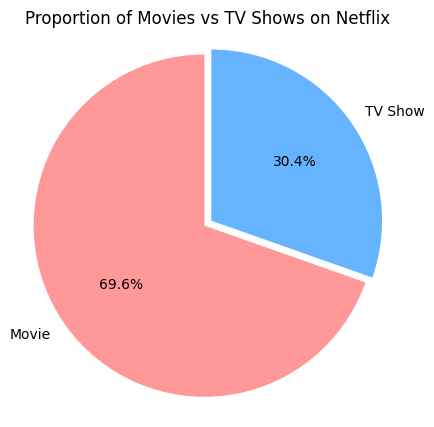

In [6]:

type_counts = df['type'].value_counts()


plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.05, 0))
plt.title('Proportion of Movies vs TV Shows on Netflix')
plt.axis('equal')  
plt.show()


In [7]:
from collections import Counter

all_genres = df['genre'].explode()

genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)  # Top 10 genres


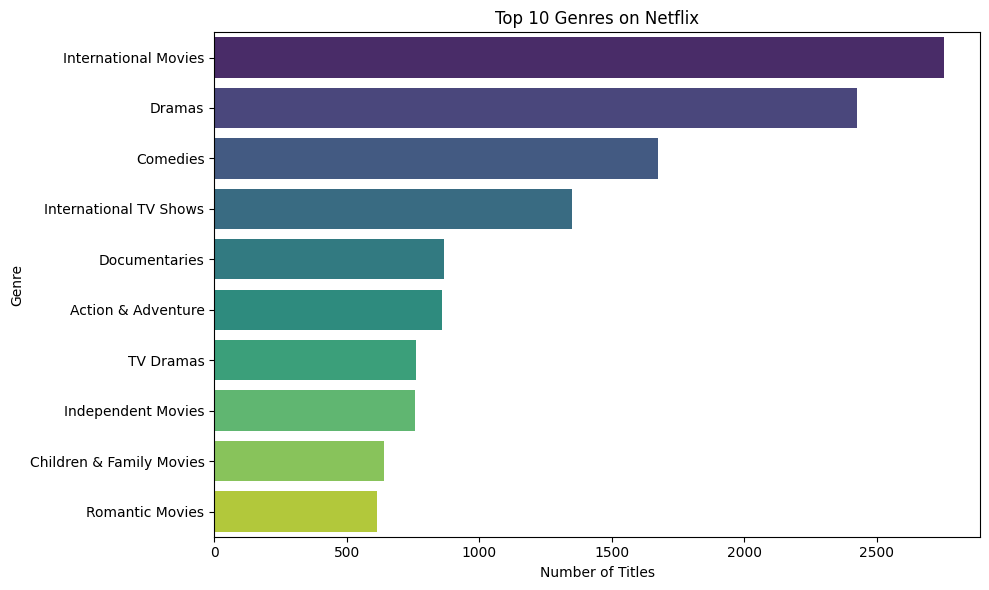

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


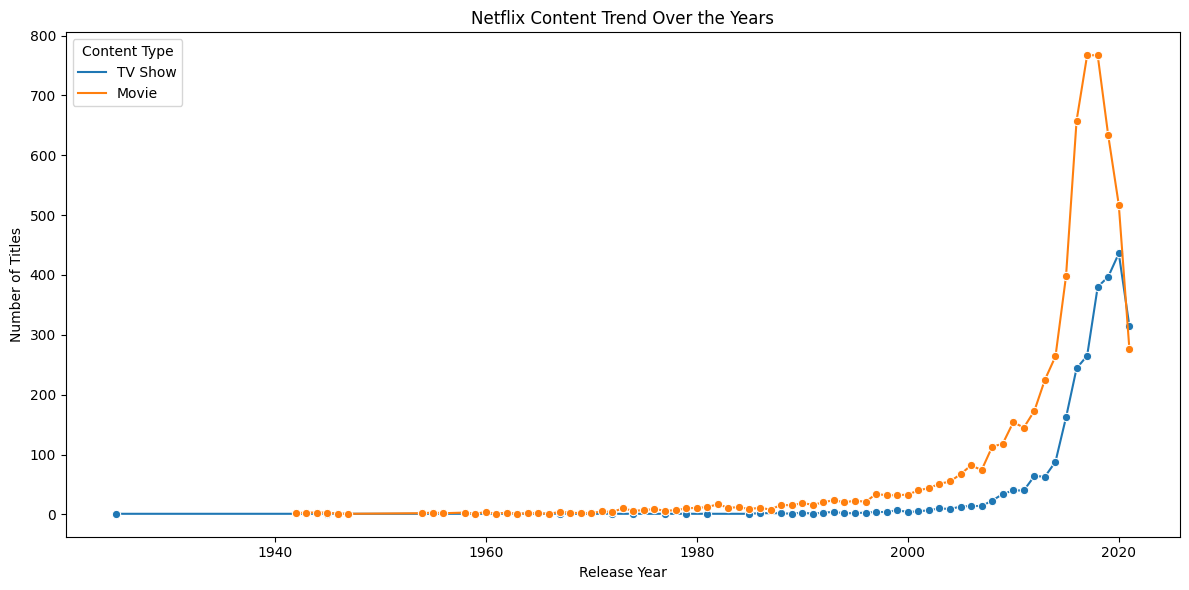

In [9]:
df_clean = df.dropna(subset=['release_year'])
content_trend = df_clean.groupby(['release_year', 'type']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')

plt.title('Netflix Content Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


In [14]:
df_duration = df.dropna(subset=['duration'])

movies = df_duration[df_duration['type'] == "Movie"].copy()
tv_shows = df_duration[df_duration['type'] == 'TV Show'].copy()

movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(int)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)


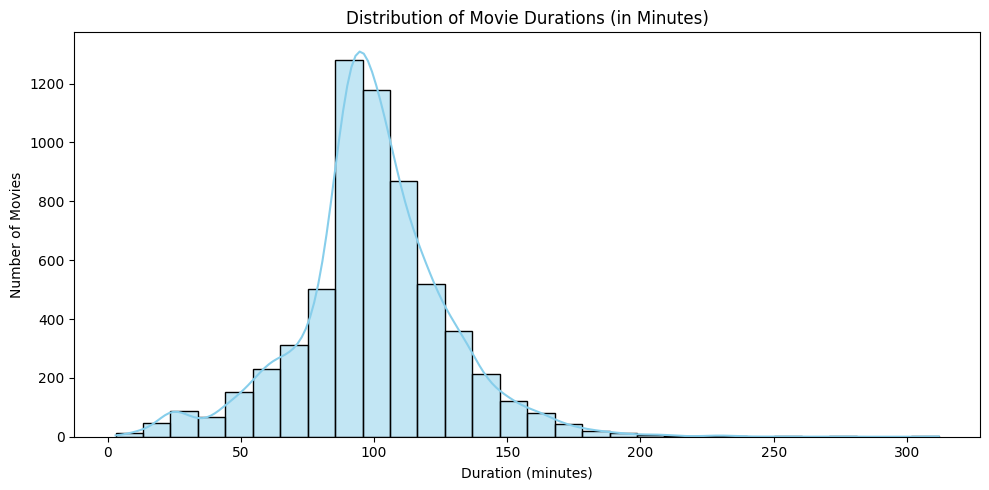

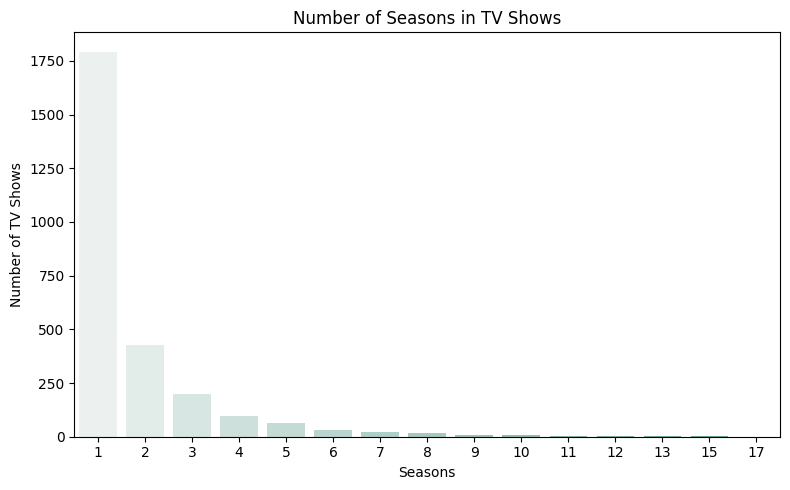

In [16]:

plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_min'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='duration_seasons', data=tv_shows, palette='light:#5A9')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()


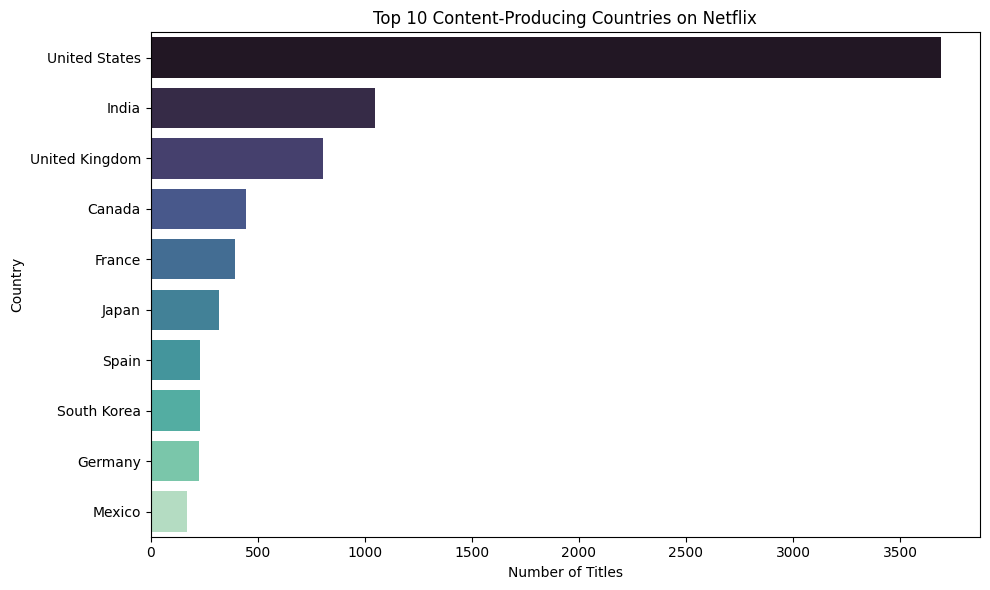

In [19]:

from collections import Counter


df_countries = df.dropna(subset=['country'])


all_countries = df_countries['country'].str.split(', ').explode()

country_counts = Counter(all_countries)

country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
country_df = country_df.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=country_df, x='Count', y='Country', palette='mako')

plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()





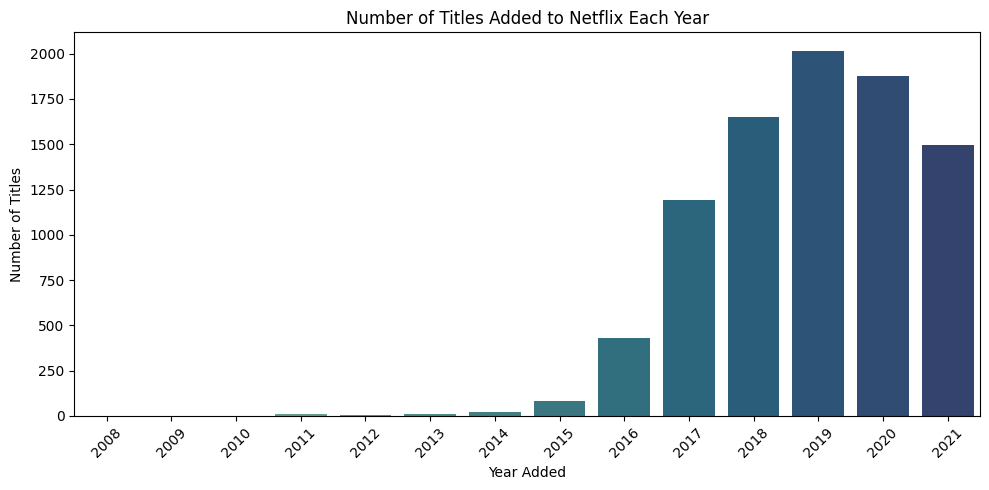

In [21]:

= df.dropna(subset=['date_added']).copy()

df_date['date_added'] = pd.to_datetime(df_date['date_added'])

df_date['year_added'] = df_date['date_added'].dt.year
df_date['month_added'] = df_date['date_added'].dt.month_name()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_date, x='year_added', palette='crest')

plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

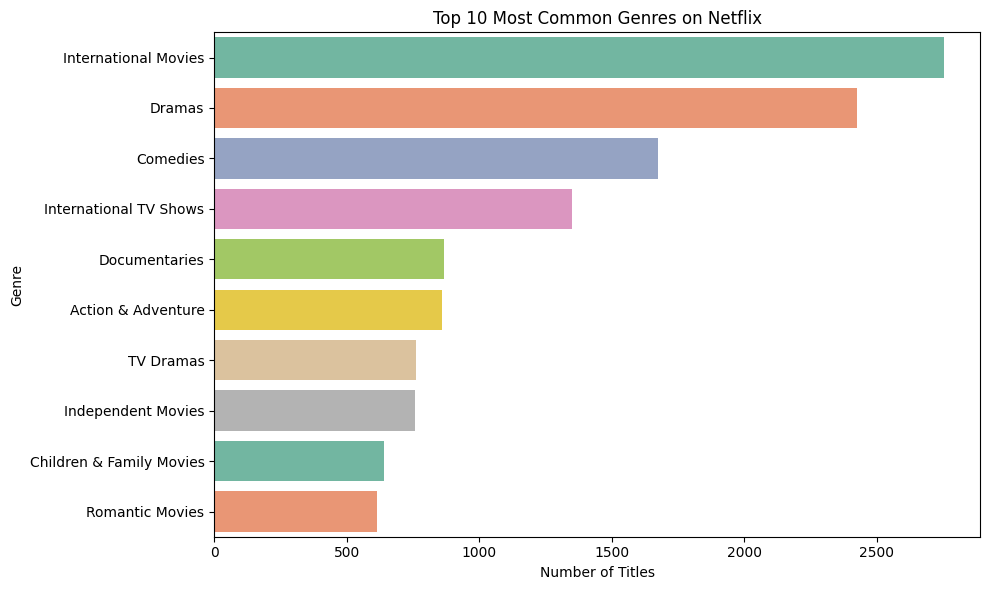

In [33]:
from collections import Counter

# Drop missing values
df_genres = df.dropna(subset=['listed_in']).copy()

# Split multiple genres and flatten the list
all_genres = df_genres['listed_in'].str.split(', ').explode()

# Count genre occurrences
genre_counts = Counter(all_genres)

# Convert to DataFrame and get top 10
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='Set2')

plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

